In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from signalai import config
from taskchain.task import Config
import pandas as pd
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

In [3]:
config_path = config.CONFIGS_DIR / 'models' / 'freq_splitter' / 'basic_inceptiontime.yaml'
conf = Config(
    config.TASKS_DIR,  # where shoud be data stored
    config_path,
    global_vars=config,  # set global variables
)

In [4]:
chain = conf.chain()
chain.set_log_level('DEBUG')
chain

|                | name           | group   | namespace   | computed   |
|:---------------|:---------------|:--------|:------------|:-----------|
| dataset_loader | dataset_loader |         |             | True       |
| gen_generator  | gen_generator  |         |             |            |
| train_model    | train_model    |         |             | False      |
| trained_model  | trained_model  |         |             |            |

In [8]:
signal_model = chain.trained_model.value

trained_model - run started with params: signal_model_config={'signal_model_type': 'torch_signal_model', 'model': InceptionTime(
  (inception_blocks): ModuleList(
    (0): InceptionBlock(
      (activation): SELU()
      (inception_1): InceptionModule(
        (conv_from_bottleneck_1): Conv1d(1, 32, kernel_size=(11,), stride=(1,), padding=(5,), bias=False)
        (conv_from_bottleneck_2): Conv1d(1, 32, kernel_size=(21,), stride=(1,), padding=(10,), bias=False)
        (conv_from_bottleneck_3): Conv1d(1, 32, kernel_size=(41,), stride=(1,), padding=(20,), bias=False)
        (max_pool): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
        (conv_from_maxpool): Conv1d(1, 32, kernel_size=(1,), stride=(1,), bias=False)
        (batch_norm): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): SELU()
      )
      (inception_2): InceptionModule(
        (bottleneck): Conv1d(128, 32, kernel_size=(1,), stride=(1,),

In [9]:
signal_model

In [10]:
from signalai.signal.signal import Signal
from signalai.signal.fake_dataset import ToneGenerator
import numpy as np

fake_generator = ToneGenerator(fs=44100, max_signal_length=16384*2, freq=[1000, 16000], noise_ratio=5.)
a, _ = next(fake_generator)
b, _ = next(fake_generator)
cc = (a + b) / 2

In [11]:
np.expand_dims(cc.signal, 0)

array([[[ 3.05726341, -0.74769484,  0.57424324, ..., -1.48203405,
          0.26957311, -0.05899097]]])

In [12]:
dd = Signal(signal_model.eval_on_batch(np.expand_dims(cc.signal, 0))[0])

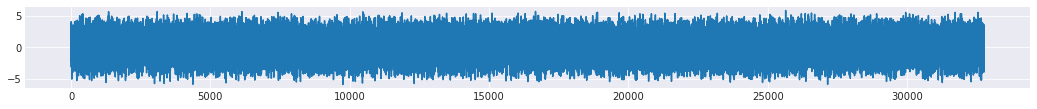

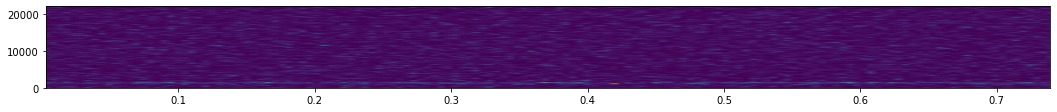

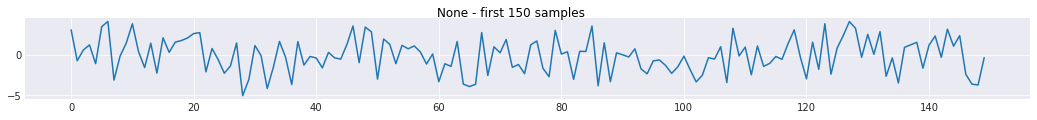

In [13]:
cc.show_all(44100)

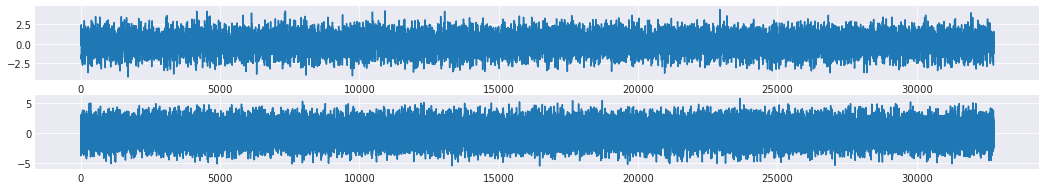

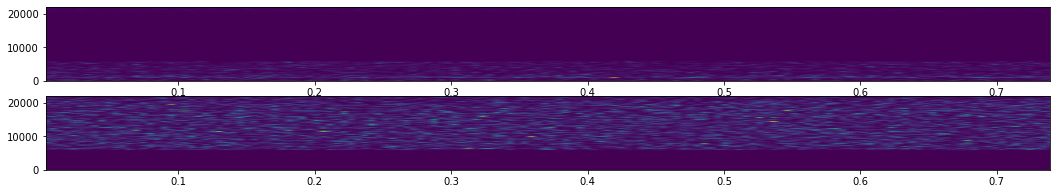

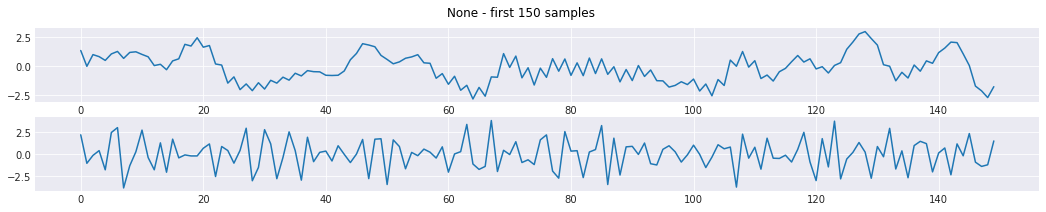

In [14]:
dd.show_all(44100)

In [15]:
import audio2numpy as a2n
x,sr=a2n.audio_from_file("/home/martin/Music/Still D.R.E.mp3")
c = Signal(np.expand_dims(x[1000000:1300000, 0], 0))

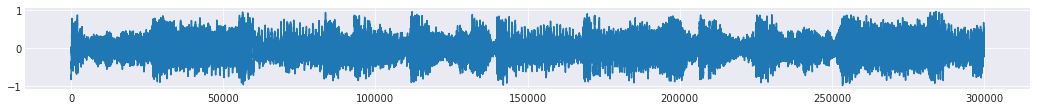

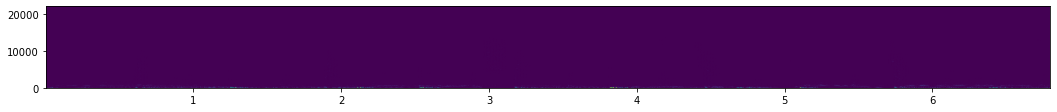

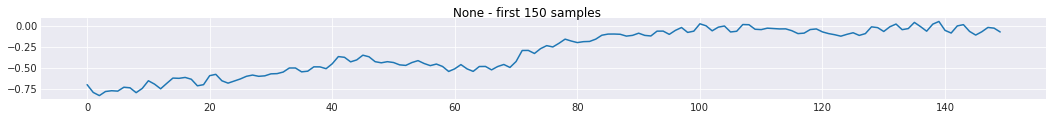

In [16]:
c.show_all(44100)

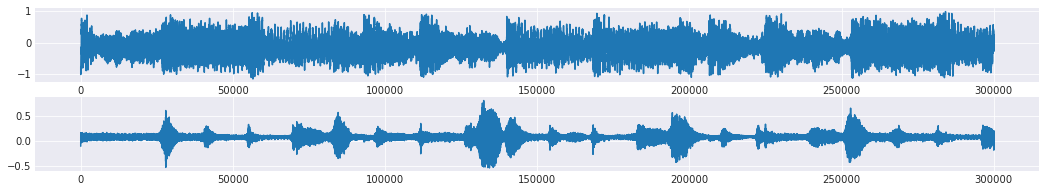

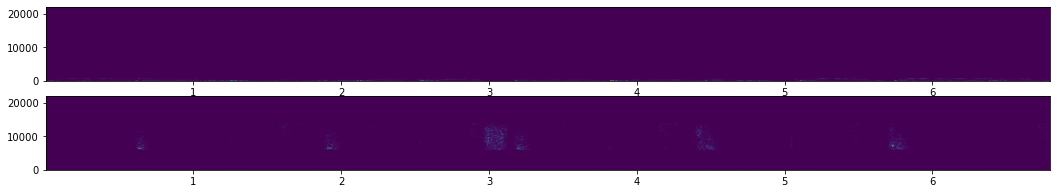

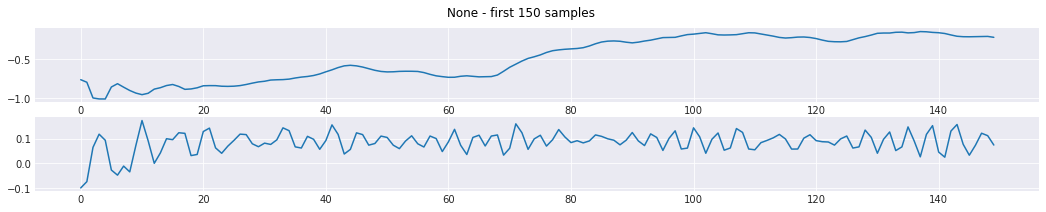

In [17]:
d = Signal(signal_model.eval_on_batch(np.expand_dims(c.signal, 0))[0])
d.show_all(44100)

In [22]:
d.play(1)